In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Admission_Predict.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

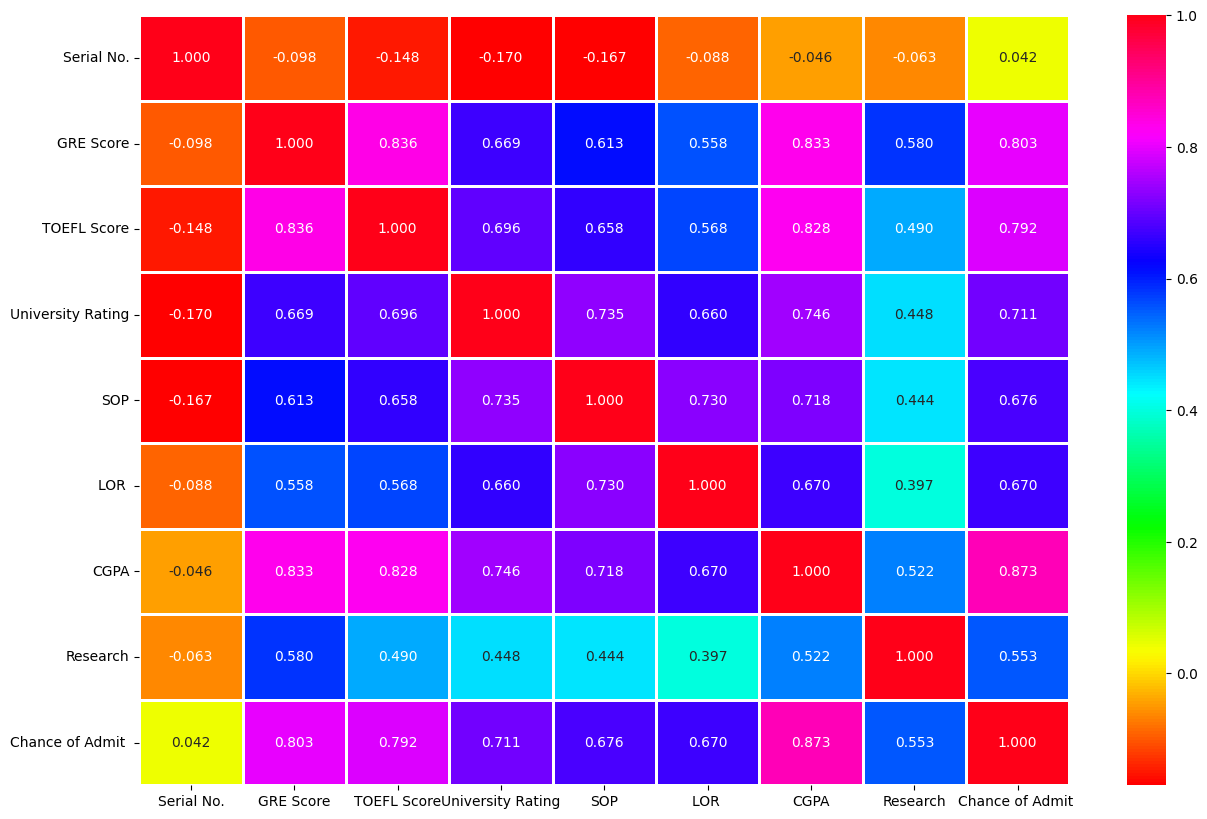

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap='hsv', fmt='.3f', linewidth=2)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.drop(columns=['Serial No.'], axis=1, inplace=True)

In [ ]:
X=df.drop(columns=['Chance of Admit '],axis=1)
y=df['Chance of Admit ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
len(X_train[0])

7

In [ ]:
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential

In [ ]:
nn = [
    layers.Dense(16 , input_dim=7, activation='relu', kernel_initializer='uniform'),
    layers.Dropout(0.1, input_shape=(16,)),
    layers.Dense(8, activation='relu', kernel_initializer='uniform'),
    layers.Dropout(0.1, input_shape=(8,)),
    layers.Dense(8, activation='relu', kernel_initializer='uniform'),
    layers.Dropout(0.1, input_shape=(8,)),
    layers.Dense(8, activation='relu', kernel_initializer='uniform'),
    layers.Dense(4, activation='relu', kernel_initializer='uniform'),
    layers.Dense(4, activation='relu', kernel_initializer='uniform'),
    layers.Dense(1, activation='sigmoid', kernel_initializer='uniform'),
]

In [ ]:
model = Sequential(nn)

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(X_train, y_train, epochs=70, batch_size=8, verbose=1, validation_split=0.2)

Epoch 1/70
32/32 [==============================] - 3s 13ms/step - loss: 0.0653 - val_loss: 0.0763
Epoch 2/70
32/32 [==============================] - 0s 6ms/step - loss: 0.0614 - val_loss: 0.0718
Epoch 3/70
32/32 [==============================] - 0s 6ms/step - loss: 0.0567 - val_loss: 0.0656
Epoch 4/70
32/32 [==============================] - 0s 5ms/step - loss: 0.0488 - val_loss: 0.0499
Epoch 5/70
32/32 [==============================] - 0s 7ms/step - loss: 0.0239 - val_loss: 0.0068
Epoch 6/70
32/32 [==============================] - 0s 7ms/step - loss: 0.0074 - val_loss: 0.0058
Epoch 7/70
32/32 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0057
Epoch 8/70
32/32 [==============================] - 0s 5ms/step - loss: 0.0071 - val_loss: 0.0056
Epoch 9/70
32/32 [==============================] - 0s 6ms/step - loss: 0.0072 - val_loss: 0.0055
Epoch 10/70
32/32 [==============================] - 0s 7ms/step - loss: 0.0071 - val_loss: 0.0054
Epoch 11/70
32/32 

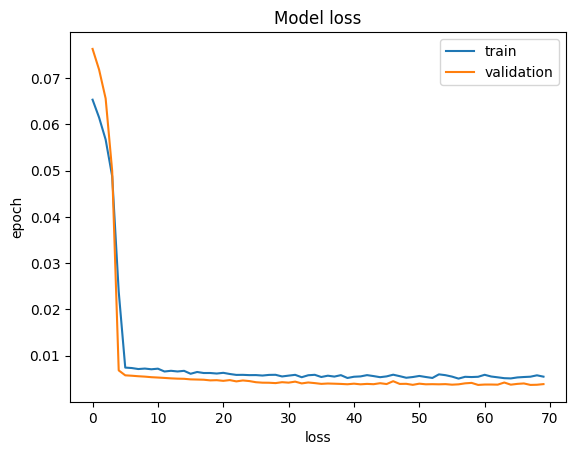

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','validation'])
plt.show()

In [ ]:
y_pred= model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, y_pred)
print('R2 score of the model: ' , r2)

R2 score of the model:  0.8008011375360009
